In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.python.client import device_lib
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("NUM GPU available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPU available:  0


IndexError: list index out of range

In [32]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 664822295865881759
xla_global_id: -1
]


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [10]:
def prepare_image(file):
    image_path = 'test-images/'
    img = image.load_img(image_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    image_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(image_array_expanded_dims)

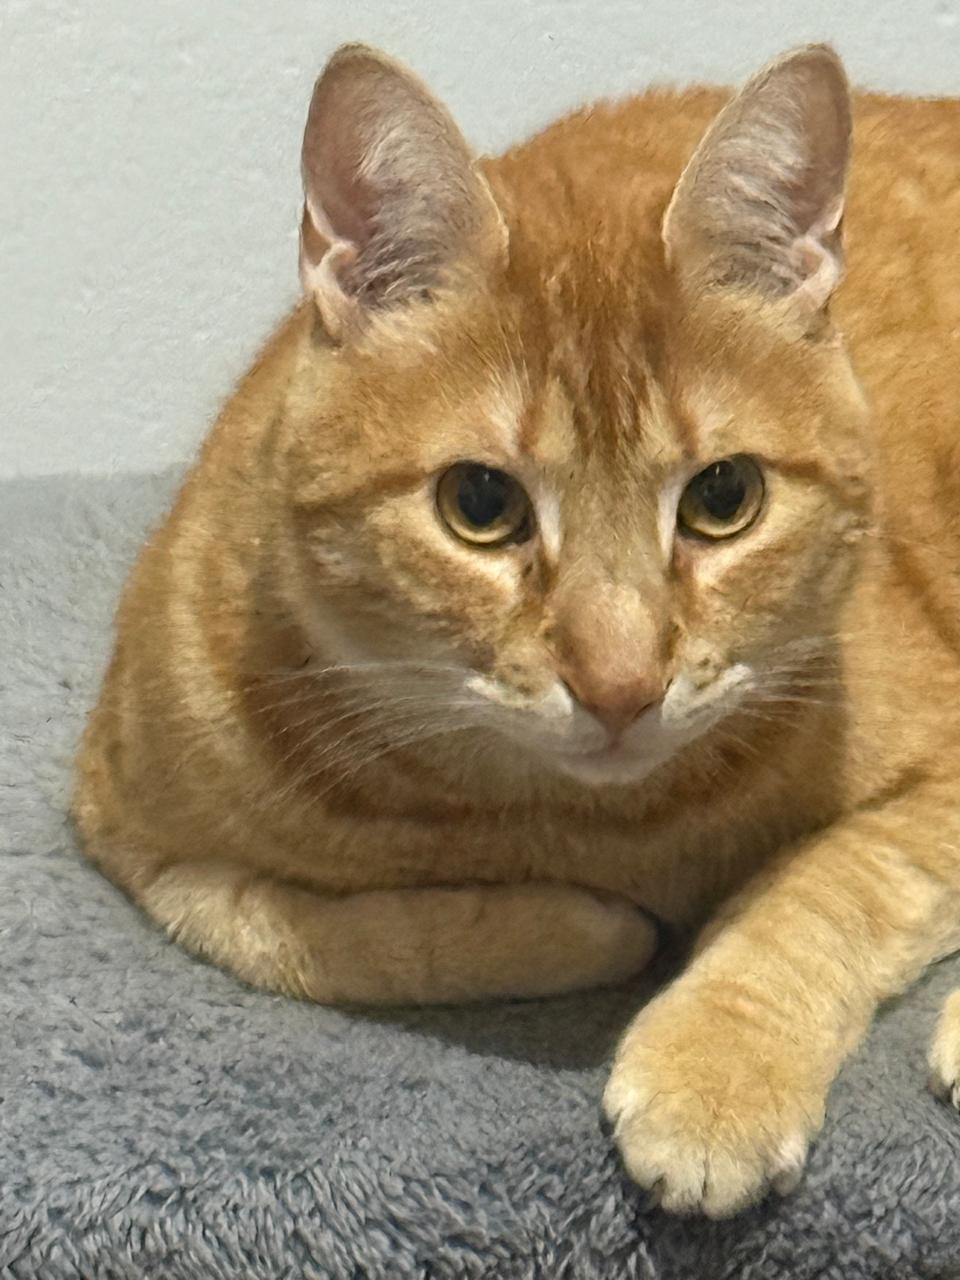

In [18]:
from IPython.display import Image
Image(filename = 'test-images/3.jpeg', width=300, height=200)

In [16]:
preprocessed_image = prepare_image('3.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


[[('n02124075', 'Egyptian_cat', np.float32(0.40343451)),
  ('n02123045', 'tabby', np.float32(0.27942508)),
  ('n02123159', 'tiger_cat', np.float32(0.18416509)),
  ('n02127052', 'lynx', np.float32(0.057516806)),
  ('n03958227', 'plastic_bag', np.float32(0.009767092))]]